<a href="https://colab.research.google.com/github/petr-ngn/ML_Siamese_Neural_Networks/blob/main/04_Live_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevant libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import cv2

Mounting the Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Importing a costume created module by Petr Nguyen

In [ ]:
sys.path.append('/content/drive/MyDrive/Agile_ML/src_PN')

In [ ]:
import PN_functions as PN


Setting a path

In [ ]:
path = '/content/drive/MyDrive/Agile_ML'
os.chdir(path)

Setting path to the live demo images' folders

In [ ]:
reference_photos_path = './reference_imgs/'
onsite_photos_path = './onsite_imgs/'

Accessing images' names

In [ ]:
reference_photos_names = sorted(os.listdir(reference_photos_path))
onsite_photos_names = sorted(os.listdir(onsite_photos_path))

In [ ]:
print(f"rerefence photos' names: {reference_photos_names}")
print(f"on-site photos' names: {onsite_photos_names}")

rerefence photos' names: ['DM_REF.jpg', 'NM_REF.jpg', 'PH_REF.jpg', 'PN_REF.jpg', 'RP_REF.jpg']
on-site photos' names: ['DM_ON.jpg', 'NM_ON.jpg', 'PH_ON.jpg', 'PN_ON.jpg', 'RP_ON.jpg']


Plotting the team reference and on-site images

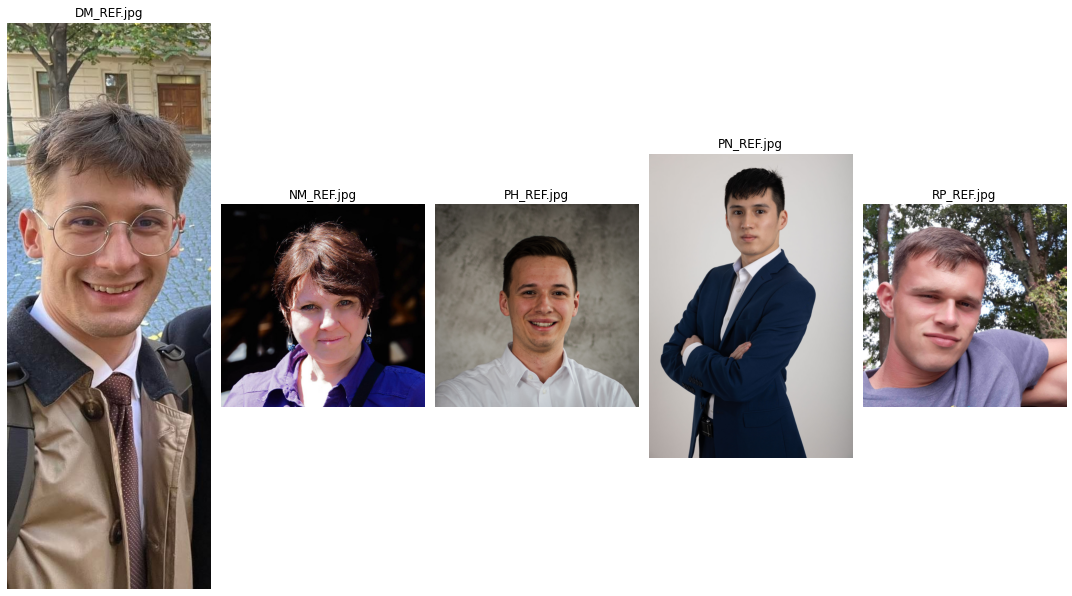

In [ ]:
PN.plot_single_images(reference_photos_names, reference_photos_path)

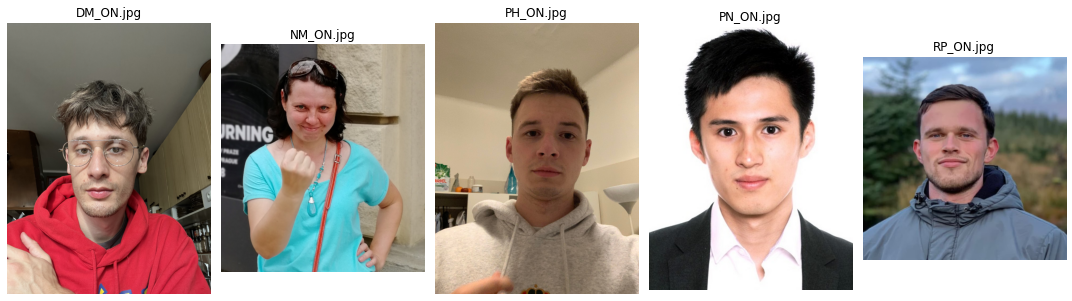

In [ ]:
PN.plot_single_images(onsite_photos_names, onsite_photos_path)

Plotting the pairs

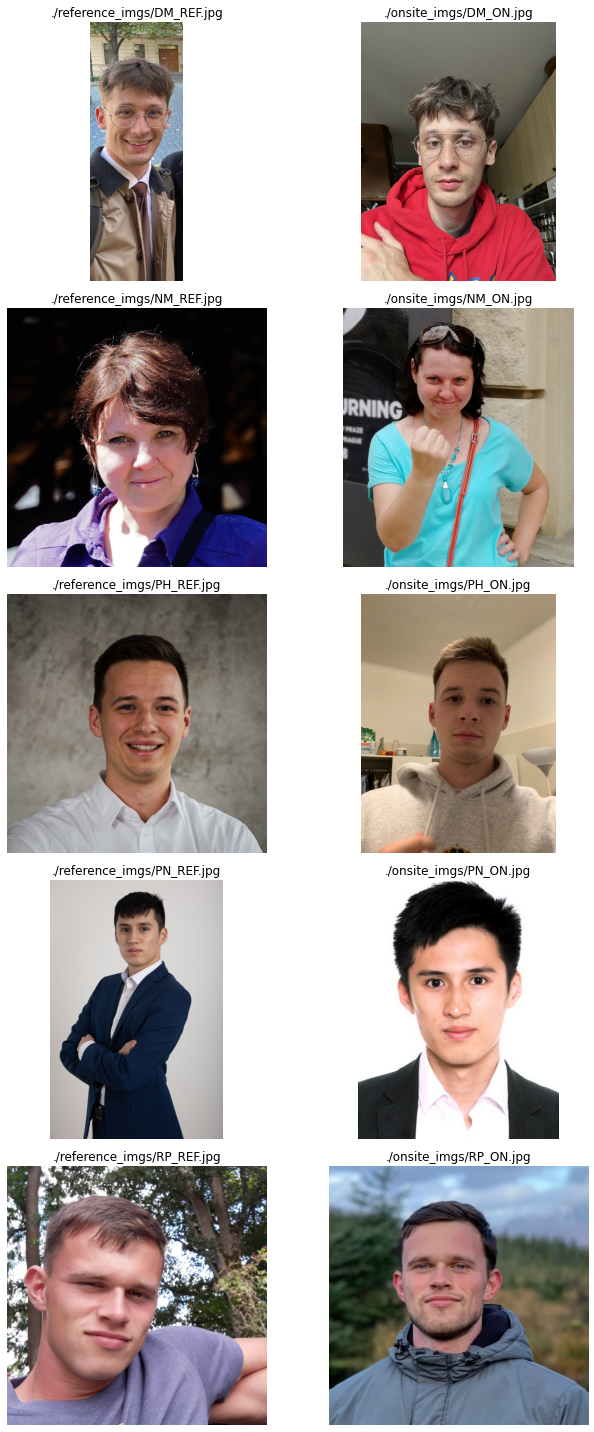

In [ ]:
PN.plot_pairs(reference_photos_names, onsite_photos_names,
              reference_photos_path, onsite_photos_path,
              5, 2, (10,20))

Cropping the images

In [ ]:
reference_photos_cropped = PN.cropping_engine(reference_photos_path,
                                              reference_photos_names)

In [ ]:
onsite_photos_cropped = PN.cropping_engine(onsite_photos_path,
                                           onsite_photos_names)

Plotting the cropped images

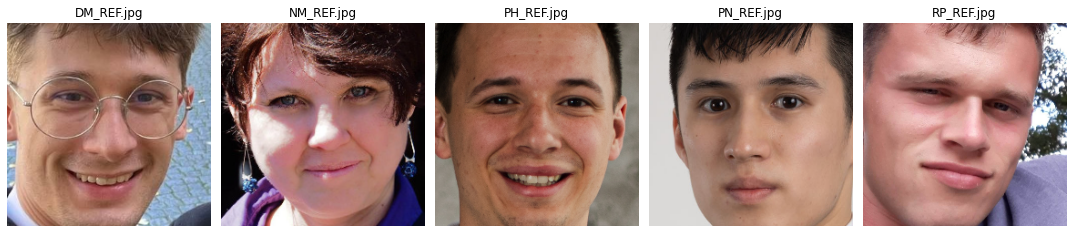

In [ ]:
PN.plot_single_images(photos_dict = reference_photos_cropped)

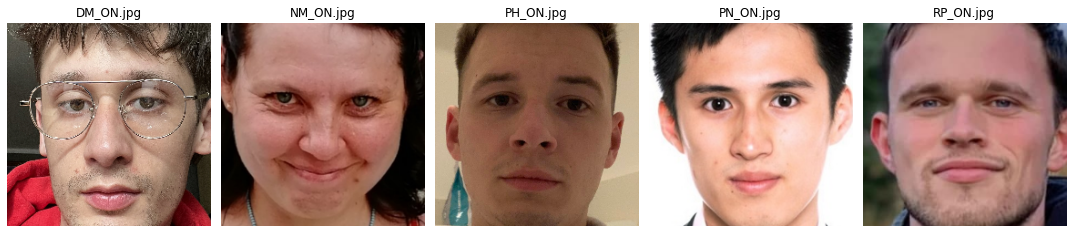

In [ ]:
PN.plot_single_images(photos_dict = onsite_photos_cropped)

Saving the cropped images

In [ ]:
if not os.path.exists('./cropped_live_demo/'):
    os.makedirs('./cropped_live_demo/')

In [ ]:
for name, photo in reference_photos_cropped.items():
    cv2.imwrite(f'./cropped_live_demo/{name}', photo)

In [ ]:
for name, photo in onsite_photos_cropped.items():
    cv2.imwrite(f'./cropped_live_demo/{name}', photo)

Loading and extracting the cropped images' names

In [ ]:
cropped_list = sorted(os.listdir('./cropped_live_demo/'))

In [ ]:
ref_init = 'REF'

In [ ]:
ref_list = [f'./cropped_live_demo/{i}' for i in cropped_list if ref_init in i]
onsite_list = [f'./cropped_live_demo/{i}' for i in cropped_list if ref_init not in i]

In [ ]:
print(ref_list)
print(onsite_list)

['./cropped_live_demo/DM_REF.jpg', './cropped_live_demo/NM_REF.jpg', './cropped_live_demo/PH_REF.jpg', './cropped_live_demo/PN_REF.jpg', './cropped_live_demo/RP_REF.jpg']
['./cropped_live_demo/DM_ON.jpg', './cropped_live_demo/NM_ON.jpg', './cropped_live_demo/PH_ON.jpg', './cropped_live_demo/PN_ON.jpg', './cropped_live_demo/RP_ON.jpg']


Loading the final model

In [ ]:
final_model = tf.keras.models.load_model('Siamese_NN_.h5',
                                         custom_objects = {'contrastive__loss':PN.contrastive_loss})

Exctrating the Convolutional Neural Network embedding

In [ ]:
CNN_model = final_model.get_layer('CNN')

TF preparation of the reference photos

In [ ]:
ref_imgs = PN.tf_single_prep(ref_list)

Computing feature vectors of reference photos

In [ ]:
ref_feat_vecs = CNN_model.predict(ref_imgs)

1/1 [==============================] - 8s 8s/step


Storing the feature vectors of reference photos into a data frame

In [ ]:
ref_feat_vecs_df = pd.DataFrame(np.transpose(ref_feat_vecs),
                                columns = [i.split('/')[-1] for i in ref_list])

In [ ]:
ref_feat_vecs_df

,DM_REF.jpg,NM_REF.jpg,PH_REF.jpg,PN_REF.jpg,RP_REF.jpg
0,0.198329,-0.983251,-0.633892,-0.999496,0.452919
1,0.987989,0.774560,0.515195,-0.995932,0.949694
2,-0.792221,0.887568,-0.153179,0.971649,-0.743597
3,0.999665,-0.391930,0.997066,0.911321,0.999194
4,0.351500,0.998241,-0.569553,0.976464,0.209684
5,0.964485,-0.824334,0.959835,0.890370,0.958041
6,0.862111,0.018881,0.627062,0.582608,0.961450
7,0.972452,0.510178,0.730001,-0.961310,0.917899
8,-0.997229,0.575596,-0.917935,0.996646,-0.996941
9,-0.978998,-0.112687,-0.946935,-0.554264,-0.984880


Exporting the reference photos' feature vectors into CSV

In [ ]:
ref_feat_vecs_df.to_csv('ref_feat_vecs_df.csv', index = False)

Loading the reference photos' feature vectors from CSV

In [ ]:
ref_feat_vecs_df = pd.read_csv('ref_feat_vecs_df.csv')

In [ ]:
ref_feat_vecs_df

,DM_REF.jpg,NM_REF.jpg,PH_REF.jpg,PN_REF.jpg,RP_REF.jpg
0,0.198329,-0.983251,-0.633892,-0.999496,0.452919
1,0.987989,0.774560,0.515195,-0.995932,0.949694
2,-0.792221,0.887568,-0.153179,0.971649,-0.743597
3,0.999665,-0.391930,0.997066,0.911320,0.999194
4,0.351500,0.998241,-0.569553,0.976464,0.209684
5,0.964485,-0.824334,0.959835,0.890370,0.958041
6,0.862111,0.018881,0.627062,0.582608,0.961450
7,0.972452,0.510178,0.730001,-0.961310,0.917899
8,-0.997229,0.575596,-0.917935,0.996646,-0.996941
9,-0.978998,-0.112687,-0.946935,-0.554264,-0.984880


TF preparation of the on-site photos

In [ ]:
onsite_imgs = PN.tf_single_prep(onsite_list)

Computing feature vectors of on-site photos

In [ ]:
onsite_feat_vecs = CNN_model.predict(onsite_imgs)

1/1 [==============================] - 0s 33ms/step


Storing the feature vectors of on-site photos into a data frame

In [ ]:
onsite_feat_vecs_df = pd.DataFrame(np.transpose(onsite_feat_vecs),
                                   columns = [i.split('/')[-1] for i in onsite_list])

In [ ]:
onsite_feat_vecs_df

,DM_ON.jpg,NM_ON.jpg,PH_ON.jpg,PN_ON.jpg,RP_ON.jpg
0,-0.983794,-0.882506,0.643528,-0.999468,-0.635474
1,0.266921,-0.591849,0.996141,-0.999131,0.061682
2,0.061681,0.958674,-0.466180,0.943306,0.858692
3,-0.267117,-0.364122,0.999737,0.418941,0.595627
4,0.904257,0.930873,-0.962884,0.996738,0.579077
5,0.526913,-0.115910,0.873896,0.936857,0.988918
6,-0.573929,0.557884,-0.116648,0.743132,0.794022
7,0.743137,0.183000,0.978807,-0.878563,0.747013
8,0.869843,0.766147,-0.999013,0.997477,0.626191
9,-0.224789,-0.551587,-0.992829,0.608368,-0.596085


Predicting a person class (of on-site photo) based on precomputed feature vectors of refererence photos (by minimizing the Euclidean distance).

In [ ]:
predicted_pairs, euclidean_distances = PN.live_demo_preds(ref_feat_vecs_df,
                                                          onsite_feat_vecs_df)

In [ ]:
euclidean_distances

{'DM_ON.jpg': {'DM_REF.jpg': 3.304215226013532,
  'NM_REF.jpg': 1.815188361134875,
  'PH_REF.jpg': 3.057471517109541,
  'PN_REF.jpg': 2.883828450025302,
  'RP_REF.jpg': 3.4498106543656317},
 'NM_ON.jpg': {'DM_REF.jpg': 3.7550678776354207,
  'NM_REF.jpg': 1.7366533967787883,
  'PH_REF.jpg': 3.3288648644290273,
  'PN_REF.jpg': 2.0449357262360888,
  'RP_REF.jpg': 3.819518373483029},
 'PH_ON.jpg': {'DM_REF.jpg': 1.73164315718109,
  'NM_REF.jpg': 4.0849602005295536,
  'PH_REF.jpg': 1.6573679221849889,
  'PN_REF.jpg': 4.575193575473367,
  'RP_REF.jpg': 1.6320291460986671},
 'PN_ON.jpg': {'DM_REF.jpg': 4.369068792498553,
  'NM_REF.jpg': 3.1717037118903706,
  'PH_REF.jpg': 3.886626309270171,
  'PN_REF.jpg': 1.276774454950981,
  'RP_REF.jpg': 4.415956597808335},
 'RP_ON.jpg': {'DM_REF.jpg': 2.7077656633840315,
  'NM_REF.jpg': 2.4417194958518995,
  'PH_REF.jpg': 2.2905231666665316,
  'PN_REF.jpg': 2.1524773191011457,
  'RP_REF.jpg': 2.771951881239713}}

In [ ]:
predicted_pairs

{'DM_ON.jpg': 'NM_REF.jpg',
 'NM_ON.jpg': 'NM_REF.jpg',
 'PH_ON.jpg': 'RP_REF.jpg',
 'PN_ON.jpg': 'PN_REF.jpg',
 'RP_ON.jpg': 'PN_REF.jpg'}

Plotting the predicted pairs of person' photos

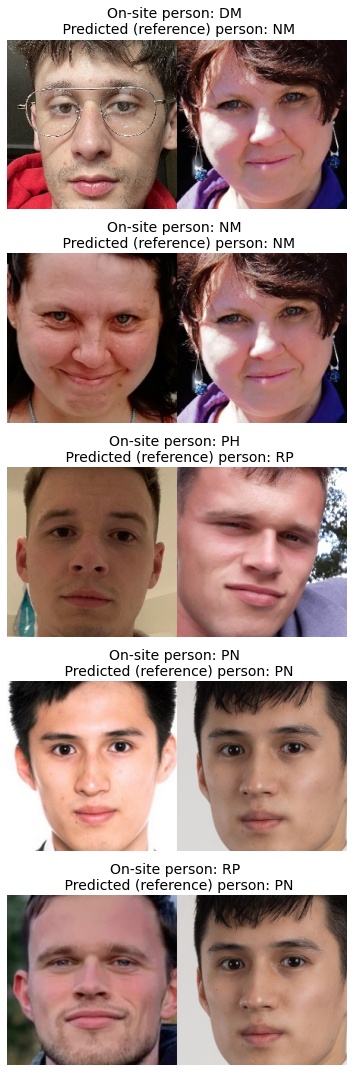

In [ ]:
PN.plot_predicted_pairs(predicted_pairs)